In [1]:
import tweepy
import configparser
from tweepy import OAuthHandler
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
config = configparser.ConfigParser()
config.read('config.txt')

[]

In [3]:
consumerKey= "a2xNU4bXnzypqEHVMoOStKS6g"
consumerSecret="YDlIP0pzUrQtXdcBXtw6Jpk03lLcuHCG4QgvQewbK0rSanzA5M"
accessToken="1308676036134019072-vhWHq1v8lBet6AhrFgmrooLI65XNcr"
accessTokenSecret="mpVNXHpP6VC4acoetHzbU9nDFLWh7gDXC4ugu81JZehit"

In [4]:
authenticate= tweepy.OAuthHandler(consumerKey, consumerSecret)
authenticate.set_access_token(accessToken,accessTokenSecret)
api=tweepy.API(authenticate, wait_on_rate_limit=True)

In [6]:
search_term='#bitcoin -filter:retweets'
tweets = tweepy.Cursor(api.search,q=search_term,lang="en",since_id='2018-11-01',tweet_mode="extended" ).items(2000)
all_tweets=[tweet.full_text for tweet in tweets]

In [13]:
df=pd.DataFrame(all_tweets,columns=['Tweets'])
df.head(11)

,Tweets
0,EMERGENCY #Bitcoin IS DUMPING NOW! It dumped d...
1,Key Aspects Of Tron System\n.\n.\n.\n#leopardo...
2,💧 NFH Airdrop 💧\n\n🏆 Task: ➕ $5 worth o...
3,@NewsAsset great work Rob. \n#Bitcoin
4,#RichQUACK 🦆\n\nClick 👇 to join our telegram f...
5,Nice work @jb55! \n\nWilliam is a #Bitcoin and...
6,People calling sub 10K #Bitcoin #btc will be t...
7,@danheld I've heard they are DCA'ing #bitcoin ...
8,So my keyboard now autocorrects my Holding to ...
9,Dry powder secured 🤌🏼\n\nThink I’m gonna sit t...


In [14]:
def cleanTwt(twt):
  twt=re.sub('#bitcoin','bitcoin',twt)
  twt=re.sub('#Bitcoin','Bitcoin',twt)
  twt=re.sub('#[A-Za-z0-9]+','',twt)
  twt=re.sub('\\n','',twt)
  twt=re.sub('https?:\/\/\S+','',twt)
  return twt

In [17]:
df['Cleaned_Tweets']=df['Tweets'].apply(cleanTwt)
df.head(11)

,Tweets,Cleaned_Tweets
0,EMERGENCY #Bitcoin IS DUMPING NOW! It dumped d...,EMERGENCY Bitcoin IS DUMPING NOW! It dumped do...
1,Key Aspects Of Tron System\n.\n.\n.\n#leopardo...,Key Aspects Of Tron System... bitcoinnews ...
2,💧 NFH Airdrop 💧\n\n🏆 Task: ➕ $5 worth o...,💧 NFH Airdrop 💧🏆 Task: ➕ $5 worth of NF...
3,@NewsAsset great work Rob. \n#Bitcoin,@NewsAsset great work Rob. Bitcoin
4,#RichQUACK 🦆\n\nClick 👇 to join our telegram f...,🦆Click 👇 to join our telegram for more inform...
5,Nice work @jb55! \n\nWilliam is a #Bitcoin and...,Nice work @jb55! William is a Bitcoin and Ligh...
6,People calling sub 10K #Bitcoin #btc will be t...,People calling sub 10K Bitcoin will be the sa...
7,@danheld I've heard they are DCA'ing #bitcoin ...,@danheld I've heard they are DCA'ing bitcoin
8,So my keyboard now autocorrects my Holding to ...,So my keyboard now autocorrects my Holding to ...
9,Dry powder secured 🤌🏼\n\nThink I’m gonna sit t...,Dry powder secured 🤌🏼Think I’m gonna sit tight...


In [21]:
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity
df['Subjectivity']=df['Cleaned_Tweets'].apply(getSubjectivity)
df['Polarity']=df['Cleaned_Tweets'].apply(getPolarity)
df.head(11)

,Tweets,Cleaned_Tweets,Subjectivity,Polarity
0,EMERGENCY #Bitcoin IS DUMPING NOW! It dumped d...,EMERGENCY Bitcoin IS DUMPING NOW! It dumped do...,0.288889,-1.555556e-01
1,Key Aspects Of Tron System\n.\n.\n.\n#leopardo...,Key Aspects Of Tron System... bitcoinnews ...,1.000000,0.000000e+00
2,💧 NFH Airdrop 💧\n\n🏆 Task: ➕ $5 worth o...,💧 NFH Airdrop 💧🏆 Task: ➕ $5 worth of NF...,0.300000,1.500000e-01
3,@NewsAsset great work Rob. \n#Bitcoin,@NewsAsset great work Rob. Bitcoin,0.750000,8.000000e-01
4,#RichQUACK 🦆\n\nClick 👇 to join our telegram f...,🦆Click 👇 to join our telegram for more inform...,0.500000,5.000000e-01
5,Nice work @jb55! \n\nWilliam is a #Bitcoin and...,Nice work @jb55! William is a Bitcoin and Ligh...,0.712963,4.166667e-01
6,People calling sub 10K #Bitcoin #btc will be t...,People calling sub 10K Bitcoin will be the sa...,0.330357,1.428571e-01
7,@danheld I've heard they are DCA'ing #bitcoin ...,@danheld I've heard they are DCA'ing bitcoin,0.000000,0.000000e+00
8,So my keyboard now autocorrects my Holding to ...,So my keyboard now autocorrects my Holding to ...,0.000000,0.000000e+00
9,Dry powder secured 🤌🏼\n\nThink I’m gonna sit t...,Dry powder secured 🤌🏼Think I’m gonna sit tight...,0.391534,-2.083375e-01


In [22]:
def getSentiment(score):
  if score<0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'

In [24]:
df['Sentiment']=df['Polarity'].apply(getSentiment)
df.head(11)

,Tweets,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,EMERGENCY #Bitcoin IS DUMPING NOW! It dumped d...,EMERGENCY Bitcoin IS DUMPING NOW! It dumped do...,0.288889,-1.555556e-01,Negative
1,Key Aspects Of Tron System\n.\n.\n.\n#leopardo...,Key Aspects Of Tron System... bitcoinnews ...,1.000000,0.000000e+00,Neutral
2,💧 NFH Airdrop 💧\n\n🏆 Task: ➕ $5 worth o...,💧 NFH Airdrop 💧🏆 Task: ➕ $5 worth of NF...,0.300000,1.500000e-01,Positive
3,@NewsAsset great work Rob. \n#Bitcoin,@NewsAsset great work Rob. Bitcoin,0.750000,8.000000e-01,Positive
4,#RichQUACK 🦆\n\nClick 👇 to join our telegram f...,🦆Click 👇 to join our telegram for more inform...,0.500000,5.000000e-01,Positive
5,Nice work @jb55! \n\nWilliam is a #Bitcoin and...,Nice work @jb55! William is a Bitcoin and Ligh...,0.712963,4.166667e-01,Positive
6,People calling sub 10K #Bitcoin #btc will be t...,People calling sub 10K Bitcoin will be the sa...,0.330357,1.428571e-01,Positive
7,@danheld I've heard they are DCA'ing #bitcoin ...,@danheld I've heard they are DCA'ing bitcoin,0.000000,0.000000e+00,Neutral
8,So my keyboard now autocorrects my Holding to ...,So my keyboard now autocorrects my Holding to ...,0.000000,0.000000e+00,Neutral
9,Dry powder secured 🤌🏼\n\nThink I’m gonna sit t...,Dry powder secured 🤌🏼Think I’m gonna sit tight...,0.391534,-2.083375e-01,Negative


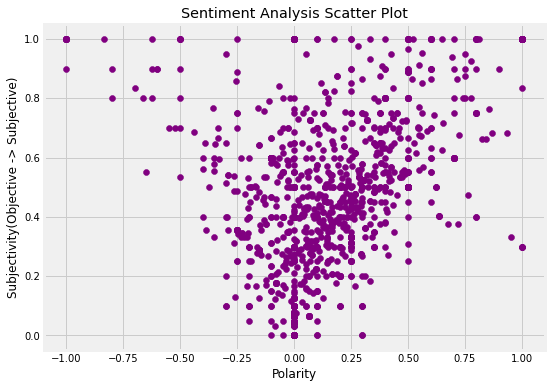

In [30]:
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Purple')
plt.title('Sentiment Analysis Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity(Objective -> Subjective)')
plt.show()

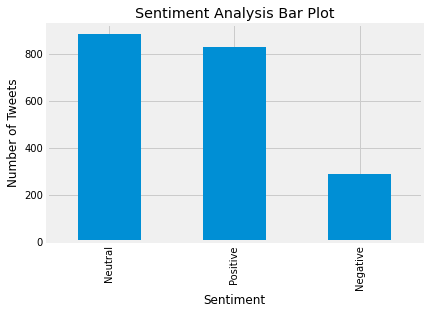

In [31]:
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()